Step 1: Setup & Data Loading


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

file_path = "/workspaces/bakudshaggy-EDA-MAS-proyecto/data/raw/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Data loaded: 70692 rows, 22 columns


Step 2: Cleaning the Data


In [3]:
# Remove duplicate rows
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Removed {initial_rows - df.shape[0]} duplicates")

# Check for missing data
print("\nMissing values check:")
print(df.isnull().sum())

Removed 1635 duplicates

Missing values check:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Step 3: Analyzing Diabetes Distribution


Diabetes distribution:
Diabetes_binary
1.0    35097
0.0    33960
Name: count, dtype: int64


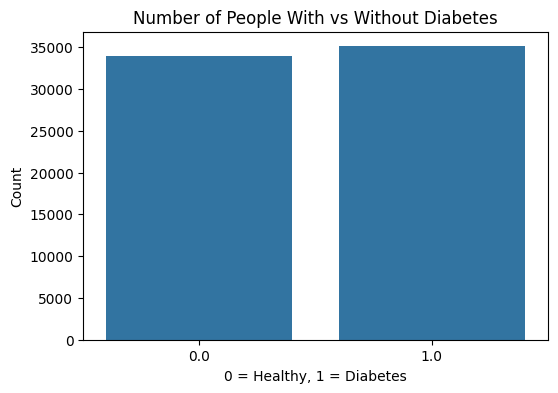

In [4]:
# Check 50-50 balance
diabetes_counts = df['Diabetes_binary'].value_counts()
print("Diabetes distribution:")
print(diabetes_counts)

# Visualize with a bar chart
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Number of People With vs Without Diabetes')
plt.xlabel('0 = Healthy, 1 = Diabetes')
plt.ylabel('Count')
plt.show()

Step 4: Analyzing High Blood Pressure


High BP vs Diabetes table:
Diabetes_binary    0.0    1.0
HighBP                       
0.0              20918   8692
1.0              13042  26405

Percentage breakdown:
Diabetes_binary        0.0        1.0
HighBP                               
0.0              70.645052  29.354948
1.0              33.062083  66.937917

Chi-square test p-value: 0.00000


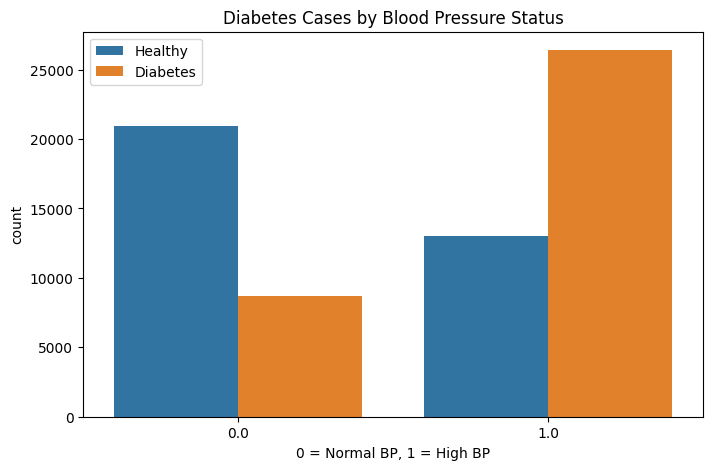

In [5]:
# Create a yes/no comparison table
contingency_table = pd.crosstab(df['HighBP'], df['Diabetes_binary'])
print("High BP vs Diabetes table:")
print(contingency_table)

# Calculate percentages
percentage_table = pd.crosstab(df['HighBP'], df['Diabetes_binary'], normalize='index')*100
print("\nPercentage breakdown:")
print(percentage_table)

# Statistical test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value:.5f}")

# Visual comparison
plt.figure(figsize=(8,5))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df)
plt.title('Diabetes Cases by Blood Pressure Status')
plt.xlabel('0 = Normal BP, 1 = High BP')
plt.legend(['Healthy', 'Diabetes'])
plt.show()

Step 5: Analyzing BMI (Numerical Feature)


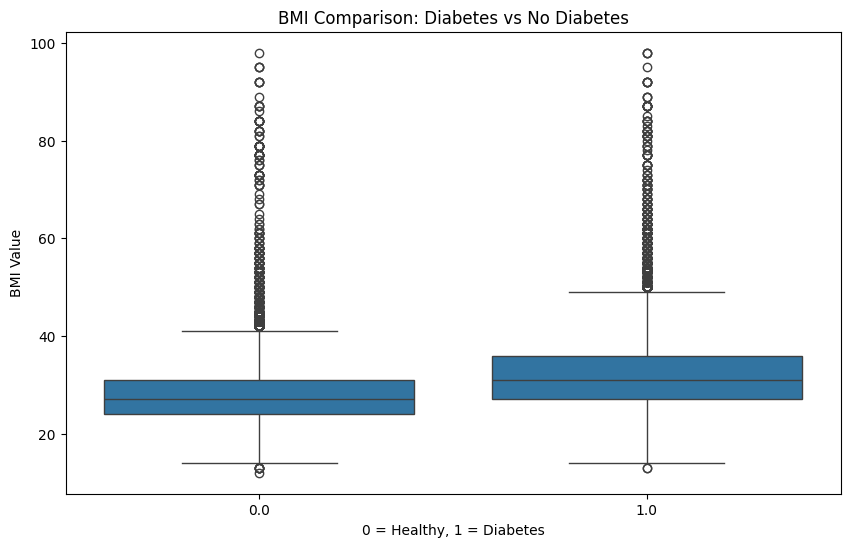


BMI Statistics:
Diabetic group:
count    35097.000000
mean        31.964242
std          7.380385
min         13.000000
25%         27.000000
50%         31.000000
75%         36.000000
max         98.000000
Name: BMI, dtype: float64

Non-diabetic group:
count    33960.000000
mean        27.880183
std          6.255242
min         12.000000
25%         24.000000
50%         27.000000
75%         31.000000
max         98.000000
Name: BMI, dtype: float64


In [6]:
# Compare BMI distributions
plt.figure(figsize=(10,6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('BMI Comparison: Diabetes vs No Diabetes')
plt.xlabel('0 = Healthy, 1 = Diabetes')
plt.ylabel('BMI Value')
plt.show()

# Get number summaries
print("\nBMI Statistics:")
print("Diabetic group:")
print(df[df['Diabetes_binary']==1]['BMI'].describe())
print("\nNon-diabetic group:")
print(df[df['Diabetes_binary']==0]['BMI'].describe())

Step 6: Analyzing Age (Ordinal Feature)


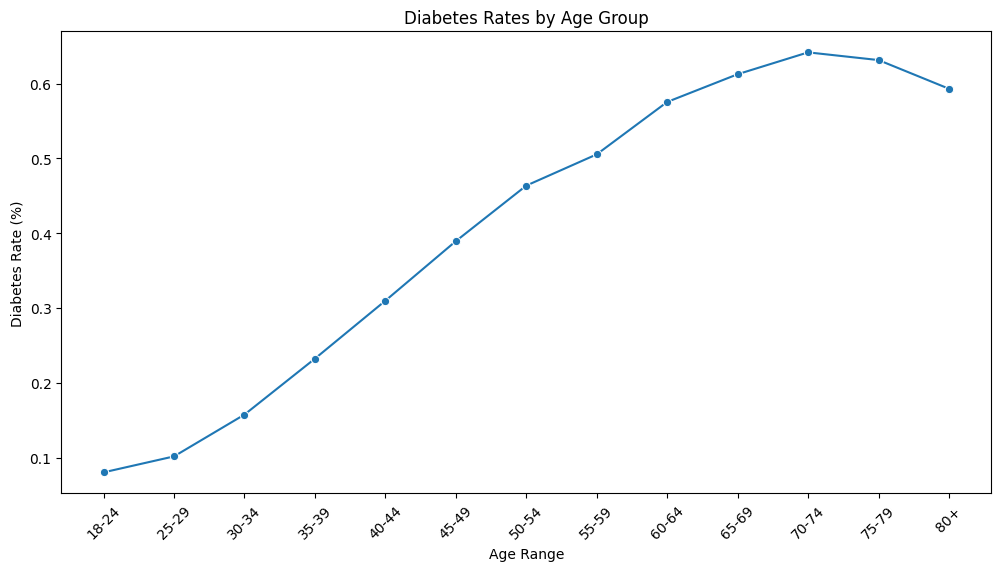

In [7]:
# Convert age codes to labels
age_labels = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80+'
}
df['AgeGroup'] = df['Age'].map(age_labels)

# Calculate diabetes rates by age
age_analysis = df.groupby('AgeGroup')['Diabetes_binary'].mean().reset_index()

# Visualize trends
plt.figure(figsize=(12,6))
sns.lineplot(x='AgeGroup', y='Diabetes_binary', data=age_analysis, marker='o')
plt.title('Diabetes Rates by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Diabetes Rate (%)')
plt.xticks(rotation=45)
plt.show()

Step 7: Correlation Analysis


In [8]:
# Calculate correlations
corr_matrix = df.corr()
diabetes_correlations = corr_matrix['Diabetes_binary'].sort_values()

print("Strongest correlations with diabetes:")
print(diabetes_correlations)

# Heatmap visualization
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Feature Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '35-39'

Step 8: Creating a New Feature


In [ ]:
# Create metabolic syndrome flag
df['Metabolic_Syndrome'] = (df['HighBP'] + df['HighChol'] + (df['BMI'] >= 30).astype(int)) >= 3

# Analyze new feature
metabolic_table = pd.crosstab(df['Metabolic_Syndrome'], df['Diabetes_binary'])
print("Metabolic Syndrome vs Diabetes:")
print(metabolic_table)

NameError: name 'df' is not defined